In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('mobile_prices.csv')
# df = pd.read_csv('mobile_prices.csv', index_col=-1)
# df.isna().sum()
# df.dropna()
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df.shape # (2000, 20)
# df.info()
# df.describe()

(2000, 21)

<AxesSubplot:>

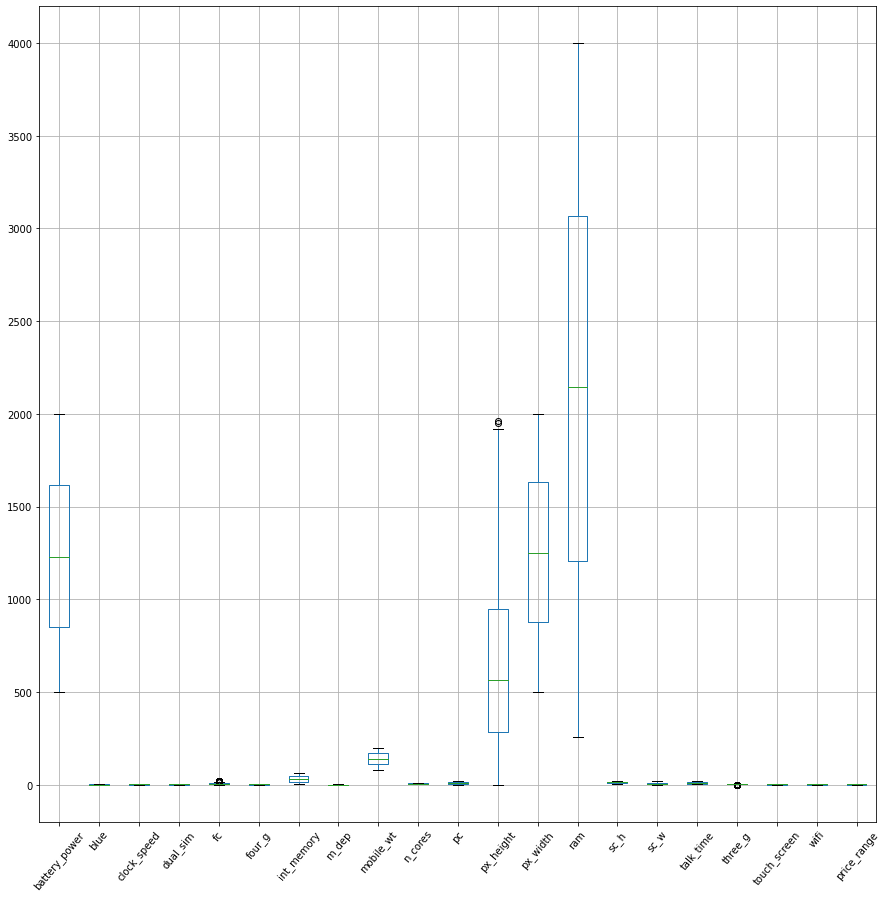

In [6]:
df.boxplot(rot=50,figsize=(15,15))

In [7]:
# df.Survived.unique()
df['price_range'].value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

In [8]:
cols = list(df.drop('price_range', 1).columns.values)
for col in cols: 
    xdf = pd.crosstab(df[col], df['price_range'], normalize=True, margins=True)*100
    print(xdf)
    print('') 

<ipython-input-8-2c528e526513>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  cols = list(df.drop('price_range', 1).columns.values)


price_range        0      1      2      3     All
battery_power                                    
501             0.00   0.05   0.05   0.00    0.10
502             0.00   0.05   0.05   0.00    0.10
503             0.05   0.05   0.00   0.05    0.15
504             0.15   0.05   0.05   0.00    0.25
506             0.00   0.00   0.05   0.00    0.05
...              ...    ...    ...    ...     ...
1995            0.00   0.05   0.05   0.00    0.10
1996            0.00   0.05   0.05   0.00    0.10
1997            0.00   0.00   0.05   0.00    0.05
1998            0.00   0.00   0.05   0.00    0.05
All            25.00  25.00  25.00  25.00  100.00

[1095 rows x 5 columns]

price_range      0      1      2      3    All
blue                                          
0            12.85  12.75  12.85  12.05   50.5
1            12.15  12.25  12.15  12.95   49.5
All          25.00  25.00  25.00  25.00  100.0

price_range      0      1      2      3     All
clock_speed                             

price_range      0     1     2      3     All
ram                                          
256           0.05   0.0   0.0   0.00    0.05
258           0.10   0.0   0.0   0.00    0.10
259           0.05   0.0   0.0   0.00    0.05
262           0.05   0.0   0.0   0.00    0.05
263           0.05   0.0   0.0   0.00    0.05
...            ...   ...   ...    ...     ...
3991          0.00   0.0   0.0   0.10    0.10
3993          0.00   0.0   0.0   0.05    0.05
3996          0.00   0.0   0.0   0.05    0.05
3998          0.00   0.0   0.0   0.05    0.05
All          25.00  25.0  25.0  25.00  100.00

[1563 rows x 5 columns]

price_range      0      1      2      3     All
sc_h                                           
5             1.20   1.35   1.10   1.20    4.85
6             1.55   1.40   1.55   1.20    5.70
7             1.70   1.95   2.30   1.60    7.55
8             1.30   1.70   1.60   1.25    5.85
9             1.50   1.45   1.75   1.50    6.20
10            1.65   1.40   1.90   1.30 

# Modèle de ML

In [9]:
df.dtypes 

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [10]:
# for col in df.columns : 
#     if df[col].dtypes == 'object' : 
#         print(col)
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col])

In [11]:
for col in df.columns[:-1]:
    x = df[df['price_range'] == 1 ].groupby([col,'price_range']).size().unstack()/len(df)*100#.plot(kind='bar', stacked=True)
    print(x)

price_range       1
battery_power      
501            0.05
502            0.05
503            0.05
504            0.05
507            0.10
...             ...
1987           0.05
1991           0.10
1992           0.05
1995           0.05
1996           0.05

[426 rows x 1 columns]
price_range      1
blue              
0            12.75
1            12.25
price_range     1
clock_speed      
0.5          5.25
0.6          1.10
0.7          0.85
0.8          0.80
0.9          0.65
1.0          1.10
1.1          0.50
1.2          0.75
1.3          1.00
1.4          0.45
1.5          1.05
1.6          0.85
1.7          0.80
1.8          0.70
1.9          1.10
2.0          0.65
2.1          0.80
2.2          0.70
2.3          0.95
2.4          0.70
2.5          0.85
2.6          0.60
2.7          0.60
2.8          1.15
2.9          0.75
3.0          0.30
price_range      1
dual_sim          
0            12.25
1            12.75
price_range     1
fc               
0            6.20
1     

In [12]:
X = df.drop('price_range', 1)
y = df['price_range']
# X #  dataframe
# y #  Series

<ipython-input-12-56f2bed3dcc3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('price_range', 1)


Répartition de survived (**pop générale**) 

In [13]:
# Répartition dees prix (**sans** `stratification`) à travers les deux échantillons `train` et `test`
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X, y)

In [14]:
y_test_sf

205     2
1661    1
710     2
1706    2
227     2
       ..
690     3
1649    1
1896    0
1677    2
184     3
Name: price_range, Length: 500, dtype: int64

In [15]:
y_train_sf.value_counts(normalize=True)

3    0.253333
2    0.251333
1    0.250667
0    0.244667
Name: price_range, dtype: float64

In [16]:
y_test_sf.value_counts(normalize=True)

0    0.266
1    0.248
2    0.246
3    0.240
Name: price_range, dtype: float64

In [17]:
# Répartition des prix (**avec** `stratification`) à travers les deux échantillons `train` et `test`
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [18]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
623,644,1,1.3,1,7,1,30,0.5,114,1,16,1140,1654,2382,9,0,19,1,0,1
822,839,0,2.0,1,0,0,14,0.4,175,7,3,564,1391,3835,15,8,11,1,0,0
1736,1779,1,2.6,1,2,0,5,0.8,90,1,3,1225,1717,1246,12,2,20,0,1,0
474,1968,0,0.9,0,0,0,22,0.8,115,3,7,861,1259,2323,9,8,7,0,0,1
561,1229,0,0.5,1,15,0,14,0.8,191,2,16,120,1878,1667,17,6,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1100,1,1.6,0,12,0,15,0.1,112,8,14,919,1344,757,12,2,16,1,1,1
1300,664,0,1.5,0,5,1,6,0.9,164,2,19,1076,1472,3774,11,5,18,1,0,0
114,1804,0,0.5,0,9,1,22,0.6,153,7,19,1158,1244,3472,9,1,20,1,0,1
180,703,1,2.7,0,12,1,30,0.3,113,1,20,218,1065,1472,14,7,7,1,0,0


In [19]:
y_train.value_counts(normalize=True)

2    0.25
3    0.25
1    0.25
0    0.25
Name: price_range, dtype: float64

In [20]:
y_test.value_counts(normalize=True)

2    0.25
0    0.25
3    0.25
1    0.25
Name: price_range, dtype: float64

# Construction de l'arbre 

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [22]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [24]:
# tree.classes_
# print(tree.max_depth)
# tree.criterion

y_pred = tree.predict(X_test)
y_pred

array([2, 2, 2, 0, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 1, 0, 1, 0, 2, 1, 3,
       1, 0, 1, 0, 2, 0, 2, 2, 1, 3, 1, 2, 0, 0, 2, 3, 0, 0, 3, 2, 1, 1,
       3, 0, 2, 3, 2, 1, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 1, 3, 0, 2, 3, 0,
       2, 1, 0, 1, 1, 3, 0, 0, 1, 2, 0, 1, 2, 2, 1, 3, 2, 0, 2, 1, 0, 3,
       3, 3, 2, 2, 0, 0, 0, 2, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 2, 0, 0, 2,
       1, 3, 2, 0, 1, 1, 0, 0, 1, 3, 2, 0, 0, 3, 3, 0, 3, 3, 3, 1, 2, 3,
       2, 3, 3, 0, 0, 1, 2, 2, 2, 3, 3, 0, 1, 0, 2, 3, 2, 3, 3, 1, 2, 3,
       2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 3, 0, 3, 2, 0, 2,
       2, 0, 1, 2, 3, 3, 3, 1, 2, 0, 1, 3, 1, 0, 2, 1, 1, 1, 2, 2, 3, 3,
       3, 2, 1, 3, 3, 0, 2, 0, 3, 0, 0, 2, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1,
       3, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 3, 3,
       2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 1, 1, 3, 0, 2, 0, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 1, 3, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 3, 0, 3, 2,
       0, 0, 0, 3, 1, 1, 2, 3, 3, 1, 0, 1, 3, 0, 0,

In [25]:
y_test.values

array([2, 2, 2, 0, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 1, 0, 2, 0, 3, 1, 3,
       1, 0, 2, 0, 2, 0, 2, 3, 2, 3, 1, 3, 0, 1, 2, 3, 0, 0, 3, 2, 1, 0,
       3, 0, 3, 3, 2, 1, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 0, 3, 0, 2, 2, 0,
       2, 1, 0, 1, 1, 3, 0, 0, 1, 2, 0, 1, 3, 2, 1, 3, 2, 1, 2, 1, 0, 3,
       3, 3, 2, 2, 0, 0, 0, 2, 2, 3, 3, 0, 3, 0, 3, 3, 0, 0, 2, 0, 0, 2,
       1, 3, 2, 0, 1, 1, 0, 0, 1, 3, 2, 1, 0, 3, 3, 0, 3, 3, 3, 1, 2, 2,
       2, 3, 3, 0, 0, 1, 3, 2, 2, 3, 3, 0, 0, 1, 3, 3, 2, 2, 3, 1, 2, 3,
       2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 2, 3, 0, 3, 2, 0, 2,
       1, 0, 0, 2, 3, 3, 3, 0, 2, 0, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2, 3, 3,
       3, 3, 2, 2, 2, 0, 2, 0, 3, 0, 1, 3, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1,
       3, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 3, 3,
       2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 1, 1, 3, 0, 2, 0, 1, 2, 1, 3, 0, 2,
       1, 2, 3, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 3, 0, 3, 2,
       0, 0, 0, 3, 1, 1, 2, 3, 2, 1, 1, 1, 3, 0, 0,

In [26]:
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(y_test, y_pred)
mat_conf
acc = mat_conf.diagonal().sum()/mat_conf.sum()
acc

0.824

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc
# score = tree.score(X_test, y_test)
# score

0.824

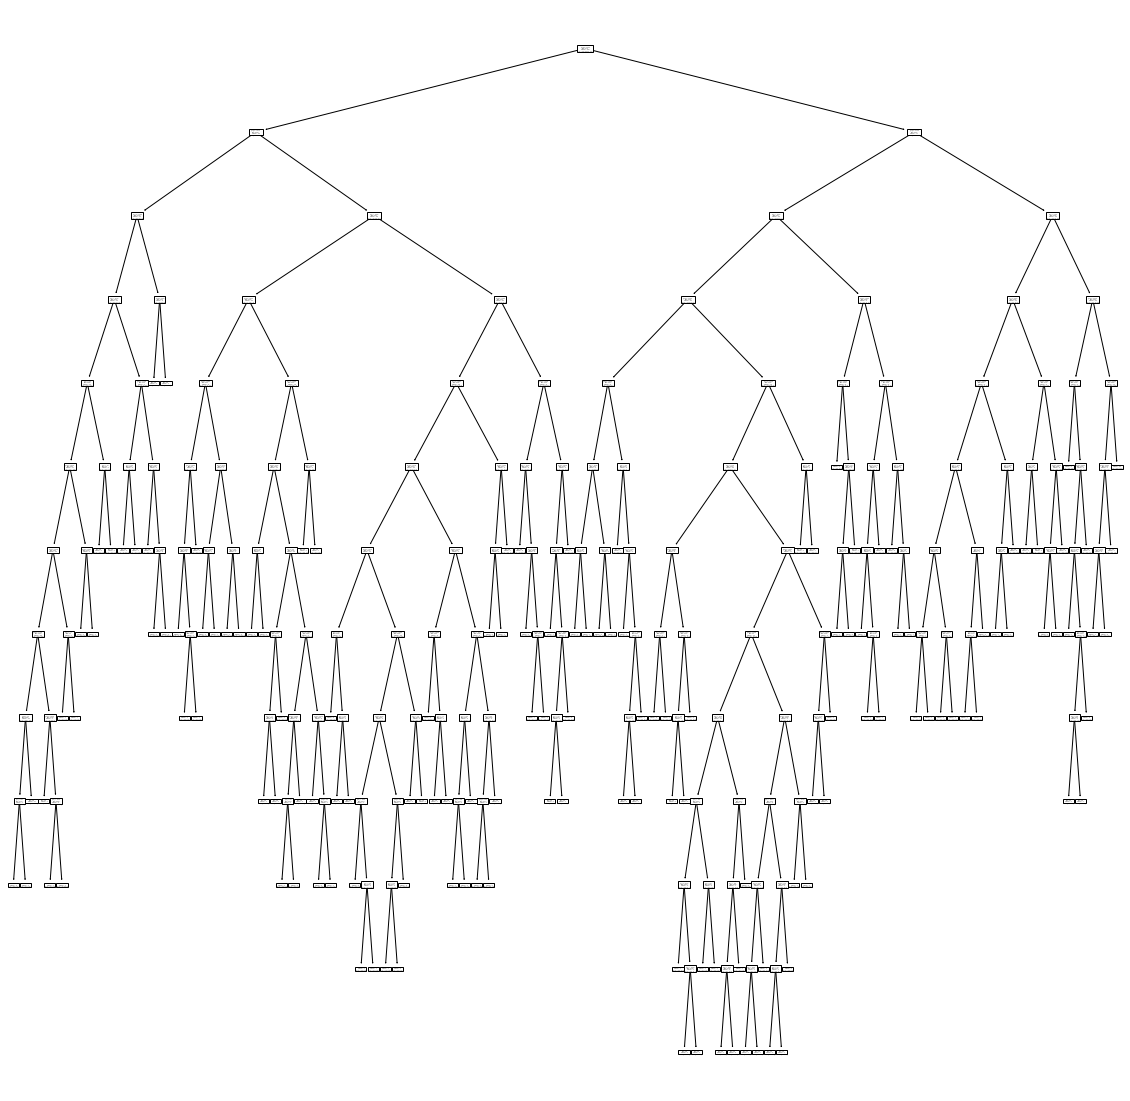

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree_df = plot_tree(tree)
# L'arbre est trop grand (illisible) => Overfittng

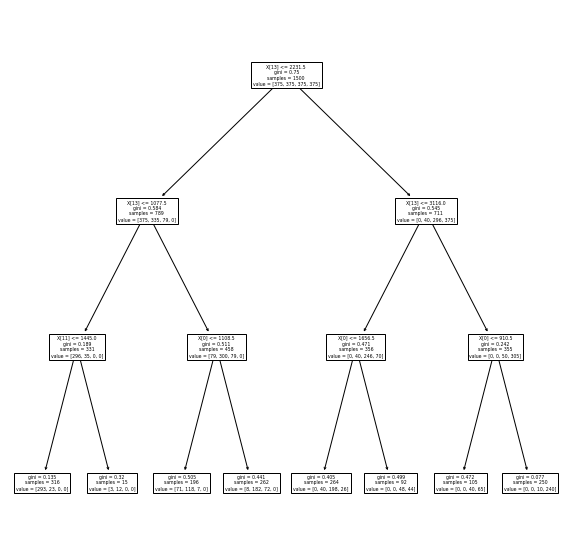

In [29]:
# Algo optimal pr les besoins du plot de l'arbre
tree=DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize = (10, 10))
tree_mobile_price = plot_tree(tree)

In [30]:
# Si vous êtes sur une version antérieure de sklearn, voici le code qui marche :
# Rq : Vous avez besoin d'installer le logiciel (Graphviz) et de rajouter les variables d'environnement.

from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,Yb_train)
dot_data = StringIO()
export_graphviz(treeG, out_file=dot_data)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("treeOpt.png")
from IPython.display import Image
Image(filename='treeOpt.png')

NameError: name 'treeOpt' is not defined

In [ ]:
from sklearn.tree import export_text
# tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
# print(tree_rules)

# Q : Cmnt extraire les régles à partir d'un arbre sous la forme d'un DataFrame :
# R :
# https://stackoverflow.com/questions/56334210/how-to-extract-sklearn-decision-tree-rules-to-pandas-boolean-conditions

In [ ]:
#####       		Optimisation de la profondeur de l'arbre		#####

scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    score=tree.score(X_test, y_test)
    scores.append(score)

In [ ]:
scores

In [ ]:
# A l'aide d'un gridsearch => plusieurs params à la fois

from sklearn.model_selection import GridSearchCV
param = [{"max_depth" : list(range(2, 10))}]
grid =  GridSearchCV(DecisionTreeClassifier(), param, cv = 10, n_jobs = -1)
grid = grid.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - grid.best_score_, treeOpt.best_params_))


In [ ]:
scores

In [ ]:
X_train.head(2)

In [ ]:
# Algo optimal pr les besoins du plot de l'arbre
tree=DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize = (10, 10))
tree_titanic = plot_tree(tree)

In [ ]:
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

# Conclusion